### Hilal Durmaz - HW1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
sns.set()
from sklearn import linear_model as lin
from sklearn import metrics as met
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection as mod
import warnings
warnings.filterwarnings('ignore')

***Question-1***

In [5]:
from sklearn import datasets as dat
data = dat.load_diabetes()
X = data.data
y = data.target


***Question-2***

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

***Question-3***

In [22]:
pipe = Pipeline([ ('scale', StandardScaler()),
                 ('clf',    lin.SGDRegressor(random_state=42))])




In [23]:
#Train RMSE in SGDRegressor with default parameter
mod.cross_val_score(pipe, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error").mean() * -1

56.43451900121812

In [24]:
#Test RMSE in SGDRegressor with default parameter
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
met.mean_squared_error(y_test, y_pred, squared=False)

53.3827048237806

***Question-4***

In [25]:
#Linear Regression
pipe2 = Pipeline([ ('scale', StandardScaler()),
                 ('clf',     lin.LinearRegression())])


In [26]:
#Train RMSE in Linear Regression with default parameter
mod.cross_val_score(pipe2, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error").mean() * -1

56.341238094702256

In [27]:
#Test RMSE in Linear Regression with default parameter
pipe2.fit(X_train, y_train)
y_pred = pipe2.predict(X_test)
met.mean_squared_error(y_test, y_pred, squared=False)

53.3694229679593

In [28]:
#SGD Regressor with 10 alpha
pipe3 = Pipeline([ ('scale', StandardScaler()),
                 ('clf',    lin.SGDRegressor(alpha=10,random_state=42))])


In [29]:
#Train RMSE in SGD Regressor with 10 alpha
mod.cross_val_score(pipe3, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error").mean() * -1

70.98862272353186

In [30]:
#Test RMSE in SGD Regressor with 10 alpha
pipe3.fit(X_train, y_train)
y_pred = pipe3.predict(X_test)
met.mean_squared_error(y_test, y_pred, squared=False)

67.92850761031465

In [31]:
#Learning Curve
def plot_learning_curve(est, X_train, y_train, X_test, y_test, isReg=True):
  x_values = []
  y_values_train = []
  y_values_test = []

  myList = np.linspace(40, len(X_train), 10)
  for i in myList:
    i = int(i)
    X_train_fold = X_train[:i]
    y_train_fold = y_train[:i]

    est.fit(X_train_fold, y_train_fold)

    #train score prediction
    y_train_pred = est.predict(X_train_fold)
    if isReg:
      train_score = met.mean_squared_error(y_train_fold, y_train_pred, squared=False)
    else:
      train_score = met.accuracy_score(y_train_fold, y_train_pred)

    #test score prediction
    y_test_pred = est.predict(X_test)
    if isReg:
      test_score = met.mean_squared_error(y_test, y_test_pred, squared=False)
    else:
      test_score = met.accuracy_score(y_test, y_test_pred)

    x_values.append(i)
    y_values_train.append(train_score)
    y_values_test.append(test_score)
  
  yTitle = "RMSE Score"
  if not isReg:
    yTitle = "Accuracy Score"
  plt.plot(x_values, y_values_train, label="train")
  plt.plot(x_values, y_values_test, label="test")
  plt.title("Learning curve")
  plt.xlabel("Train Sample Size")
  if isReg:
    plt.ylim(0, 80)
  plt.ylabel(yTitle)
  plt.legend()
  plt.grid(True)
  plt.show()

***Learning Cuve - Linear Regression***

As we expected, the higher the train RMSE value, the lower the test RMSE value.Train and test scores combined at approximately 55 RMSE , but this is not a good result. By looking at the learning curve, we cannot say that it is underfit or overfitted.

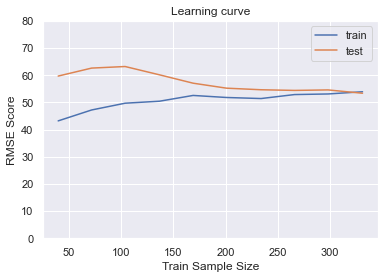

In [32]:
#Learning Cuve - Linear Regression
plot_learning_curve(pipe2, X_train, y_train, X_test, y_test, isReg=True)  

***Learning Curve - SGD Regressor(with alpha as 10, and random_state as 42)***

I used SGDRegressor (with alpha as 10, and random_state as 42). Alpha is a Constant that multiplies the regularization term. The higher the value, the stronger the regularization.I drew the learning curve of the first model I used to see how the increase of the alpha value affects the RMSE values.Model underfits the data as both the training and test scores are low.train and test RMSE score are increasing  , We expect the test RMSE value to decrease. In this situation adding more training data will NOT help. We should decrease the alpha value.

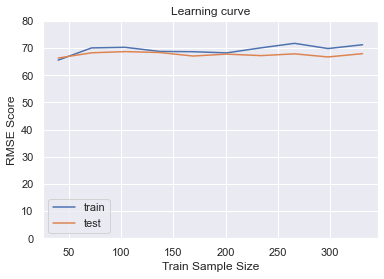

In [33]:
plot_learning_curve(pipe3, X_train, y_train, X_test, y_test, isReg=True)  


***Learning Curve - SGD Regressor***

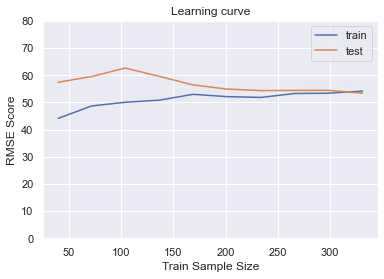

In [35]:
plot_learning_curve(pipe, X_train, y_train, X_test, y_test, isReg=True)

***Question-4***

In [20]:
pipe4 = Pipeline([ ('scale', StandardScaler()),
                 ('clf',    lin.SGDRegressor(random_state=42))])


params = {
    "clf__alpha": np.arange(0.001, 2.0, 0.005),
    'clf__penalty': ['l1','l2']
}

grid = mod.GridSearchCV(pipe4, params, scoring="neg_root_mean_squared_error", cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SGDRegressor(alpha=0.0001,
                                                     average=False,
                                                     early_stopping=False,
                                                     epsilon=0.1, eta0=0.01,
                                                     fit_intercept=True,
                                                     l1_ratio=0.15,
                                                     learning_rate='invscaling',
                                                     loss='squared_loss',
                               

In [59]:
#best parameters
grid.best_params_

{'clf__alpha': 0.106, 'clf__penalty': 'l2'}

In [36]:
grid.best_score_

-56.204747512099964

In [37]:
y_pred = grid.predict(X_test)
met.mean_squared_error(y_test, y_pred, squared=False)

53.11324023207999